# Create an environment and install dependencies


In [ ]:
!pip install --quiet -U  langgraph langsmith


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 17.4 MB/s eta 0:00:00


In [ ]:
!pip install --quiet -U langchain langchain-groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata

# 1. Fetch and Set API Keys
Grok_api_key = userdata.get('GROK_API_KEY')
Lanchain_api__key = userdata.get('LANGCHAIN_API_KEY')

print(Grok_api_key)

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


Import Required Libraries

In [ ]:
import os

# Set the API keys as environment variables for later use
os.environ['GROK_API_KEY'] = Grok_api_key
os.environ['LANGCHAIN_API_KEY'] = Lanchain_api__key


In [ ]:
from langchain_groq import ChatGroq

# Initialize ChatGroq instance
llm : ChatGroq = ChatGroq(
    api_key = Grok_api_key  ,        # Provide the Grok API key for authentication
    model="llama-3.1-8b-instant",
    temperature=0.7
)

# Test the initialization
print("ChatGroq initialized successfully!")
 # Initialize an instance of Grok AI
# grok_ai = GrokAI(
#     api_key=your_grok_api_key,  # Provide your Grok API key
#     model="grok_model_name"      # Specify the model to use if applicable
# )

ChatGroq initialized successfully!


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages
from langgraph.graph.state import CompiledStateGraph
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image



# # 3. Define Graph and State Management

In [ ]:
# Define State and Initialize LLM
class Dfj(TypedDict):
  messages : Annotated[list, add_messages]

  # Initialize StateGraph
graph_builder= StateGraph(Dfj)

# Node Functions -> uses the ChatGroq instance
def chatbot(state:Dfj):
  return {"messages":llm.invoke(state['messages'])}

# Create Tools and Build Workflow
 *  Builds the StateGraph workflow.

In [ ]:
# Add nodes to the graph
graph_builder.add_node("chatbot", chatbot)

# Add edges to the graph
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

# Compile the graph
graph = graph_builder.compile()

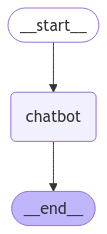

In [ ]:

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [ ]:
#  Conversation Loop
state = {"messages": []}
while True:
    user_input = input("User : ")
    if  user_input.lower() in ["quit", "q"] :
      print("GOOD BYE \U0001F60A")
      # Save the conversation history on exit
      with open("conversation_history.json", "w") as f:
          json.dump(state["messages"], f)
      break

      # Handle memory clearing
      if user_input.lower() == "clear memory":
        state["messages"] = []
        print("Memory cleared!")
        continue

    # Append user input to the conversation history
    state["messages"].append({"role": "user", "content": user_input})


    try:
    # Stream events from the graph
        for event in graph.stream({"messages": ("user", user_input)}):
        # Call the values() method and store the result
            values = event.values()  # Ensure you call the method correctly

        # Check the type of values to debug
            print("Values:", values)  # Inspect the returned data
            print("Type of values:", type(values))  # Confirm the type (likely dict or iterable)

        # Iterate over the values if they are iterable
            for value in values:  # Assuming values is an iterable (e.g., list, dict, etc.)
            # Safely access the 'messages' field if it exists
                if 'messages' in value:
                   print("Messages:", value['messages'])  # Display 'messages' field
                   print("Assistant:", value["messages"].content)  # Display the message content if accessible
            # Truncate history to avoid token limit issues
            state["messages"] = state["messages"][-20:]  # Keep only the last 20 messages
    except Exception as e:
      print(f"An error occurred: {e}")


User : hey
An error occurred: name 'graph' is not defined
